In [1]:
from urllib2 import urlopen
from json import load 
import pandas as pd
import datetime
#buliding URL:
#article for which page views need to be extracted
#look_up="Donald_Trump"


look_up=[ "Donald_Trump","Bernie_Sanders", "Hillary_Clinton","Ted_Cruz","John_Kasich","String_theory","Megan_Fox"
         ,"Shah_Rukh_Khan","Sundar_Pichai","Deep_Learning","MapReduce","Independence_Day_(United_States)"
         ,"Sam_Anderson_(Tamil_actor)","Jack_Ma","Ryan_Gosling"]


In [2]:

#dates between which page views need to be extracted in the format YYYYMMDD
startdate="20130101"
enddate="20160430"
i=0
for name in look_up:
#request URL : https://wikimedia.org/api/rest_v1/?doc
    url='https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/en.wikipedia.org/all-access/all-agents/'+name+'/daily/'+startdate+'/'+enddate

    response = urlopen(url) 

#parses the json response and creates a dictionary with key "list" and value of a  list of dictionaries where each dictionary is a day's page view data
    json_obj = load(response) 

#extacting just the list of dictionaries and creating a data frame
    if i==0:
        data=pd.DataFrame(json_obj['items'])
    else:
        data=pd.concat([data,pd.DataFrame(json_obj['items'])])
    i=i+1
#data cleaning begins

#step 1 : manipulate the timestamp to create a date attribute
data["time2"]=data["timestamp"].str.rstrip('00')
data['time2']=[x + '0' if len(x)<8 else x for x in data['time2']]
data['date']=pd.to_datetime(data["time2"],format="%Y%m%d")

In [3]:
data

,access,agent,article,granularity,project,timestamp,views,time2,date
0,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070100,82159,20150701,2015-07-01
1,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070200,83458,20150702,2015-07-02
2,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070300,55615,20150703,2015-07-03
3,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070400,43865,20150704,2015-07-04
4,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070500,42220,20150705,2015-07-05
5,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070600,38412,20150706,2015-07-06
6,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070700,44158,20150707,2015-07-07
7,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070800,48631,20150708,2015-07-08
8,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015070900,83969,20150709,2015-07-09
9,all-access,all-agents,Donald_Trump,daily,en.wikipedia,2015071000,59105,20150710,2015-07-10


In [4]:
data_views=pd.DataFrame(data['article'])
data_views['views']=data['views']

In [5]:
PDA_DataViews=data_views.groupby(['article']).count()

In [6]:
PDA_DataViews['mean']=data_views.groupby(['article']).mean()
PDA_DataViews['std']=data_views.groupby(['article']).std()
PDA_DataViews['median']=data_views.groupby(['article']).median()
PDA_DataViews['min']=data_views.groupby(['article']).min()
PDA_DataViews['max']=data_views.groupby(['article']).max()
PDA_DataViews.reset_index(level=0, inplace=False)
PDA_DataViews[['mean','std','median','min','max']]
PDA_DataViews.reset_index()

,article,views,mean,std,median,min,max
0,Bernie_Sanders,305,48601.416393,49015.837200,34756,9310,488675
1,Deep_Learning,305,48.173770,26.181916,38,13,144
2,Donald_Trump,305,154487.898361,354055.800586,75205,26675,4071156
3,Hillary_Clinton,305,21724.032787,15859.330732,15435,7135,114790
4,Independence_Day_(United_States),305,7318.180328,44064.369106,2607,1538,690870
5,Jack_Ma,305,3339.652459,1612.830785,2837,1755,15160
6,John_Kasich,305,13071.632787,25664.930996,4946,1239,274379
7,MapReduce,305,1725.281967,480.246050,1886,735,2813
8,Megan_Fox,305,10124.544262,6555.731112,8643,5550,79425
9,Ryan_Gosling,305,10130.583607,5633.753389,8956,6042,70779


In [7]:
cd=list(data['article'].unique())
cd

[u'Donald_Trump',
 u'Bernie_Sanders',
 u'Hillary_Clinton',
 u'Ted_Cruz',
 u'John_Kasich',
 u'String_theory',
 u'Megan_Fox',
 u'Shah_Rukh_Khan',
 u'Sundar_Pichai',
 u'Deep_Learning',
 u'MapReduce',
 u'Independence_Day_(United_States)',
 u'Sam_Anderson_(Tamil_actor)',
 u'Jack_Ma',
 u'Ryan_Gosling']

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import datetime as dt

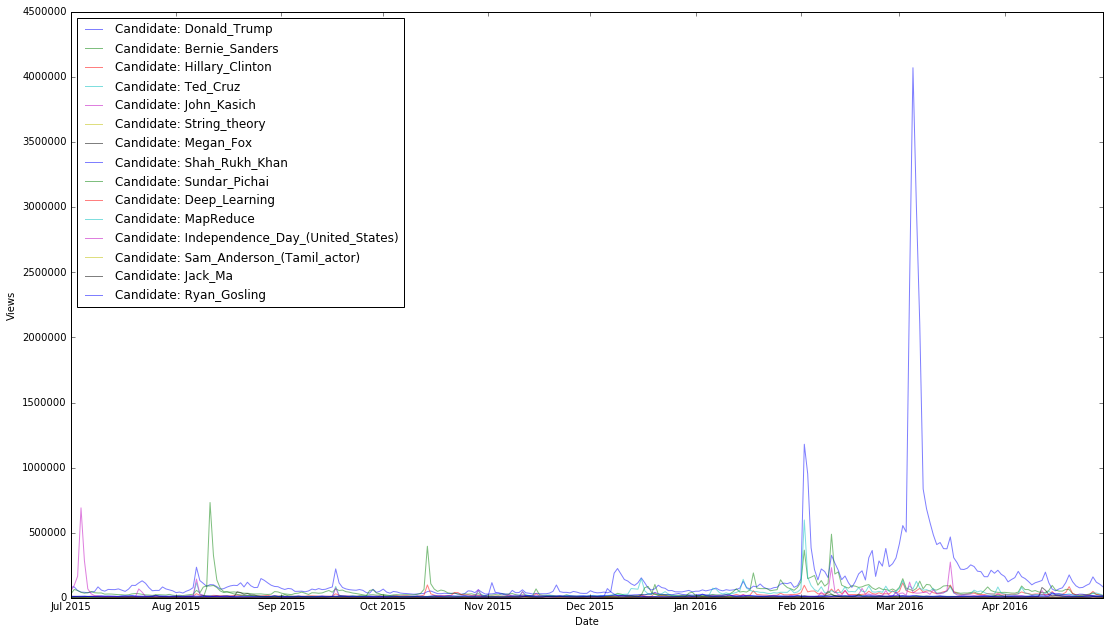

In [9]:
fig,ax = plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True)
data.sort_values(by=['article', 'date'], ascending=[True, True])
for x in cd:
    dat = data[data['article']==x]
    dates =  dat['date']
    ax.plot(dates, dat['views'], label = "Candidate: {0}".format(x), alpha=0.5)

plt.xlabel("Date")
plt.ylabel("Views")
ax.legend(loc="upper left")
plt.savefig('overview.png')



In [10]:
dt = pd.DataFrame()
for center, idx in data[data['article']=='Donald_Trump'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='Donald_Trump'].ix[idx].set_index("date")['views']
    dt[center] = timediff.resample("W", how=sum)
    
bs = pd.DataFrame()
for center, idx in data[data['article']=='Bernie_Sanders'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='Bernie_Sanders'].ix[idx].set_index("date")['views']
    bs[center] = timediff.resample("W", how=sum)
    
hc = pd.DataFrame()
for center, idx in data[data['article']=='Hillary_Clinton'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='Hillary_Clinton'].ix[idx].set_index("date")['views']
    hc[center] = timediff.resample("W", how=sum)
    
tc = pd.DataFrame()
for center, idx in data[data['article']=='Ted_Cruz'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='Ted_Cruz'].ix[idx].set_index("date")['views']
    tc[center] = timediff.resample("W", how=sum)

jk = pd.DataFrame()
for center, idx in data[data['article']=='John_Kasich'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='John_Kasich'].ix[idx].set_index("date")['views']
    jk[center] = timediff.resample("W", how=sum)
##
st = pd.DataFrame()
for center, idx in data[data['article']=='String_theory'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='String_theory'].ix[idx].set_index("date")['views']
    st[center] = timediff.resample("W", how=sum)
    
mf = pd.DataFrame()
for center, idx in data[data['article']=='Megan_Fox'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='Megan_Fox'].ix[idx].set_index("date")['views']
    mf[center] = timediff.resample("W", how=sum)
    
srk = pd.DataFrame()
for center, idx in data[data['article']=='Shah_Rukh_Khan'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='Shah_Rukh_Khan'].ix[idx].set_index("date")['views']
    srk[center] = timediff.resample("W", how=sum)
    
sp = pd.DataFrame()
for center, idx in data[data['article']=='Sundar_Pichai'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='Sundar_Pichai'].ix[idx].set_index("date")['views']
    sp[center] = timediff.resample("W", how=sum)

dl = pd.DataFrame()
for center, idx in data[data['article']=='Deep_Learning'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='Deep_Learning'].ix[idx].set_index("date")['views']
    dl[center] = timediff.resample("W", how=sum)
    
##
mr = pd.DataFrame()
for center, idx in data[data['article']=='MapReduce'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='MapReduce'].ix[idx].set_index("date")['views']
    mr[center] = timediff.resample("W", how=sum)
    
idus = pd.DataFrame()
for center, idx in data[data['article']=='Independence_Day_(United_States)'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='Independence_Day_(United_States)'].ix[idx].set_index("date")['views']
    idus[center] = timediff.resample("W", how=sum)
    
sa = pd.DataFrame()
for center, idx in data[data['article']=='Sam_Anderson_(Tamil_actor)'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='Sam_Anderson_(Tamil_actor)'].ix[idx].set_index("date")['views']
    sa[center] = timediff.resample("W", how=sum)
    
jm = pd.DataFrame()
for center, idx in data[data['article']=='Jack_Ma'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='Jack_Ma'].ix[idx].set_index("date")['views']
    jm[center] = timediff.resample("W", how=sum)

rg = pd.DataFrame()
for center, idx in data[data['article']=='Ryan_Gosling'].groupby("article").groups.iteritems():
    timediff = data[data['article']=='Ryan_Gosling'].ix[idx].set_index("date")['views']
    rg[center] = timediff.resample("W", how=sum)

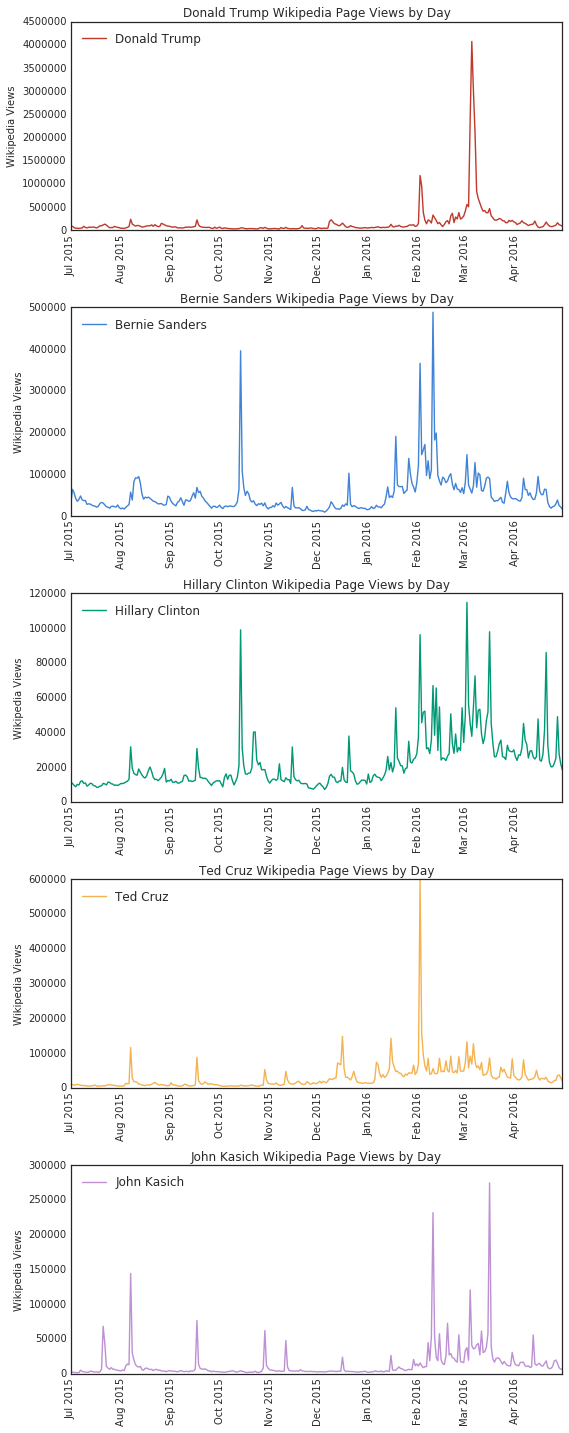

In [17]:

plt.figure(figsize=(8,20))
ax1 = plt.subplot(511)
ax1.plot(data[data['article']=='Donald_Trump']['date'], data[data['article']=='Donald_Trump']['views'], label = "Donald Trump",color="#C0392B", linewidth=1.4,)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Donald Trump Wikipedia Page Views by Day')

ax2 = plt.subplot(512)
ax2.plot(data[data['article']=='Bernie_Sanders']['date'], data[data['article']=='Bernie_Sanders']['views'], label = "Bernie Sanders", color="#4183D7", linewidth=1.4)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Bernie Sanders Wikipedia Page Views by Day')

ax3 = plt.subplot(513)
ax3.plot(data[data['article']=='Hillary_Clinton']['date'], data[data['article']=='Hillary_Clinton']['views'], label = "Hillary Clinton", color="#019875", linewidth=1.4)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Hillary Clinton Wikipedia Page Views by Day')

ax4 = plt.subplot(514)
ax4.plot(data[data['article']=='Ted_Cruz']['date'], data[data['article']=='Ted_Cruz']['views'], label = "Ted Cruz", color="#F4B350", linewidth=1.4)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Ted Cruz Wikipedia Page Views by Day')

ax5 = plt.subplot(515)
ax5.plot(data[data['article']=='John_Kasich']['date'], data[data['article']=='John_Kasich']['views'], label = "John Kasich",color="#BE90D4", linewidth=1.4,)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('John Kasich Wikipedia Page Views by Day')
plt.tight_layout()
plt.savefig("Daily_Views1.png")

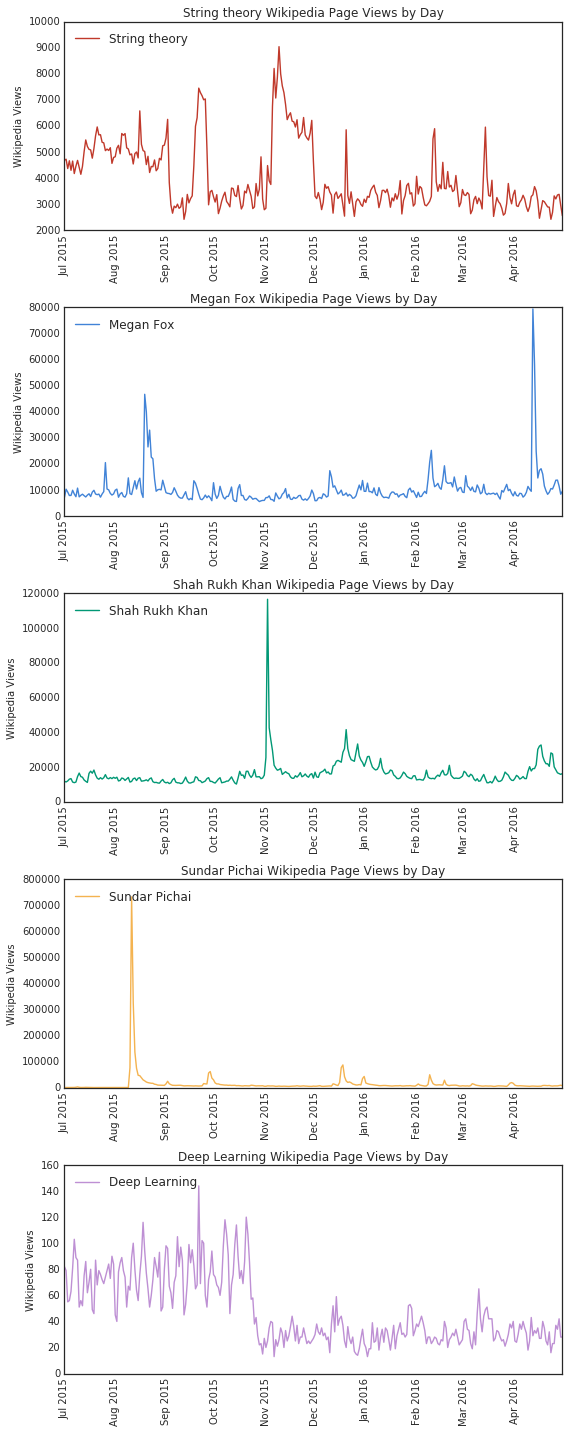

In [18]:
plt.figure(figsize=(8,20))
ax1 = plt.subplot(511)
ax1.plot(data[data['article']=='String_theory']['date'], data[data['article']=='String_theory']['views']
         , label = "String theory",color="#C0392B", linewidth=1.4,)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('String theory Wikipedia Page Views by Day')

ax2 = plt.subplot(512)
ax2.plot(data[data['article']=='Megan_Fox']['date'], data[data['article']=='Megan_Fox']['views'], label = "Megan Fox", color="#4183D7", linewidth=1.4)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Megan Fox Wikipedia Page Views by Day')

ax3 = plt.subplot(513)
ax3.plot(data[data['article']=='Shah_Rukh_Khan']['date'], data[data['article']=='Shah_Rukh_Khan']['views'], label = "Shah Rukh Khan", color="#019875", linewidth=1.4)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Shah Rukh Khan Wikipedia Page Views by Day')

ax4 = plt.subplot(514)
ax4.plot(data[data['article']=='Sundar_Pichai']['date'], data[data['article']=='Sundar_Pichai']['views'], label = "Sundar Pichai", color="#F4B350", linewidth=1.4)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Sundar Pichai Wikipedia Page Views by Day')

ax5 = plt.subplot(515)
ax5.plot(data[data['article']=='Deep_Learning']['date'], data[data['article']=='Deep_Learning']['views'], label = "Deep Learning",color="#BE90D4", linewidth=1.4,)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Deep Learning Wikipedia Page Views by Day')
plt.tight_layout()
plt.savefig("Daily_Views2.png")

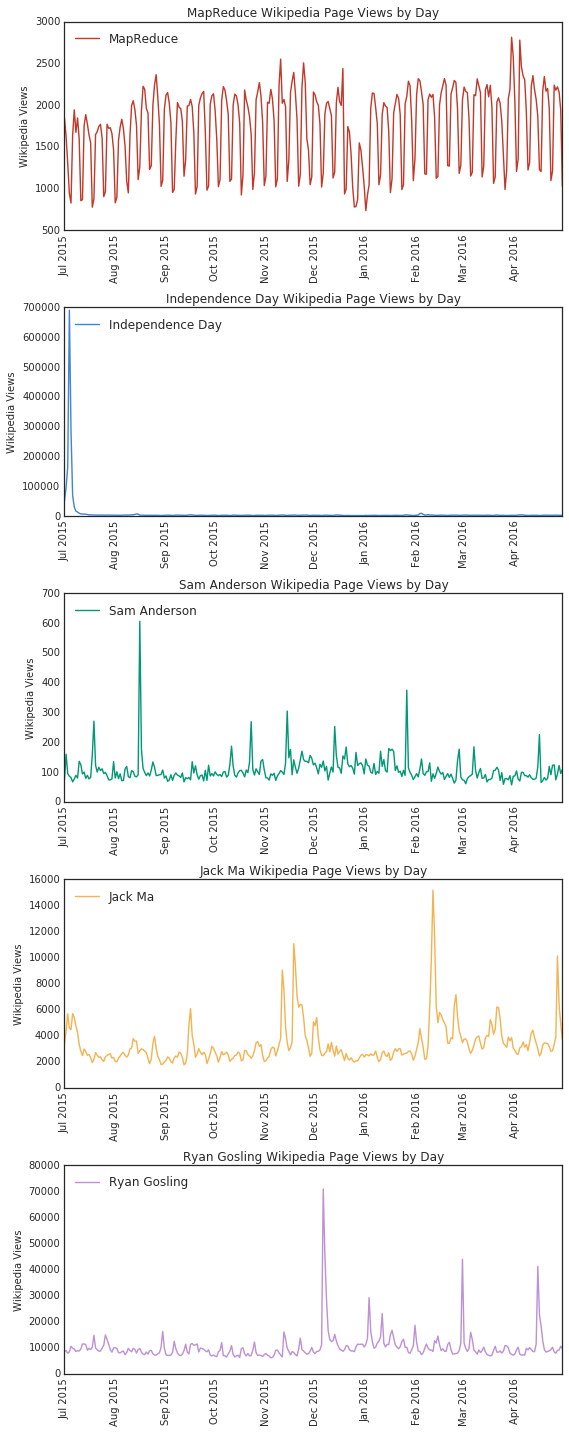

In [19]:
plt.figure(figsize=(8,20))
ax1 = plt.subplot(511)
ax1.plot(data[data['article']=='MapReduce']['date'], data[data['article']=='MapReduce']['views']
         , label = "MapReduce",color="#C0392B", linewidth=1.4,)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('MapReduce Wikipedia Page Views by Day')

ax2 = plt.subplot(512)
ax2.plot(data[data['article']=='Independence_Day_(United_States)']['date']
         , data[data['article']=='Independence_Day_(United_States)']['views']
         , label = "Independence Day", color="#4183D7", linewidth=1.4)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Independence Day Wikipedia Page Views by Day')

ax3 = plt.subplot(513)
ax3.plot(data[data['article']=='Sam_Anderson_(Tamil_actor)']['date'], data[data['article']=='Sam_Anderson_(Tamil_actor)']['views']
         , label = "Sam Anderson", color="#019875", linewidth=1.4)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Sam Anderson Wikipedia Page Views by Day')

ax4 = plt.subplot(514)
ax4.plot(data[data['article']=='Jack_Ma']['date'], data[data['article']=='Jack_Ma']['views']
         , label = "Jack Ma", color="#F4B350", linewidth=1.4)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Jack Ma Wikipedia Page Views by Day')

ax5 = plt.subplot(515)
ax5.plot(data[data['article']=='Ryan_Gosling']['date'], data[data['article']=='Ryan_Gosling']['views']
         , label = "Ryan Gosling",color="#BE90D4", linewidth=1.4,)
plt.xticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Ryan Gosling Wikipedia Page Views by Day')
plt.tight_layout()
plt.savefig("Daily_Views3.png")

In [15]:
import matplotlib

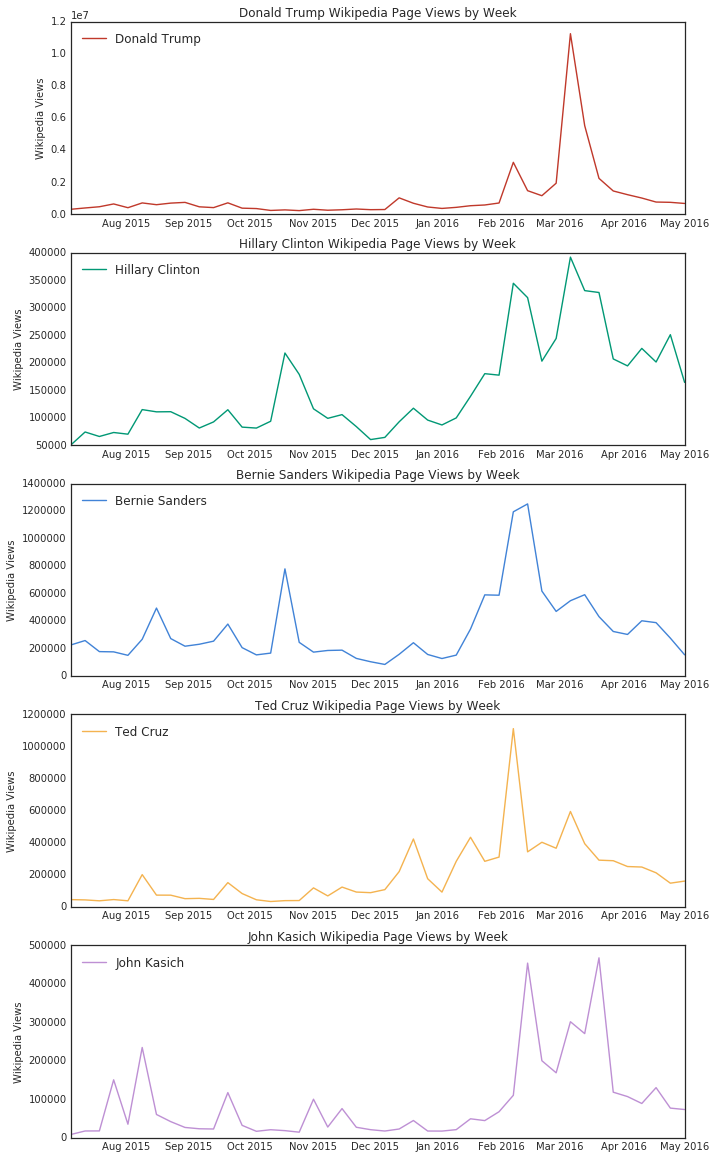

In [20]:
matplotlib.style.use('seaborn-white')
plt.figure(figsize=(11,20))
ax1 = plt.subplot(511)
ax1.plot(dt.index, dt, color="#C0392B", linewidth=1.4, label = "Donald Trump")
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.ylabel('Wikipedia Views')
plt.title('Donald Trump Wikipedia Page Views by Week')

ax2 = plt.subplot(512)
ax2.plot(hc.index, hc, color="#019875", linewidth=1.4, label = "Hillary Clinton")
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.ylabel('Wikipedia Views')
plt.title('Hillary Clinton Wikipedia Page Views by Week')


ax3 = plt.subplot(513)
ax3.plot(bs.index, bs, color="#4183D7", linewidth=1.4, label = "Bernie Sanders")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Bernie Sanders Wikipedia Page Views by Week')

ax4 = plt.subplot(514)
ax4.plot(tc.index, tc, color="#F4B350", linewidth=1.4, label = "Ted Cruz")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Ted Cruz Wikipedia Page Views by Week')

ax4 = plt.subplot(515)
ax4.plot(jk.index, jk, color="#BE90D4", linewidth=1.4, label = "John Kasich")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('John Kasich Wikipedia Page Views by Week')

plt.savefig('Page_views1.png')

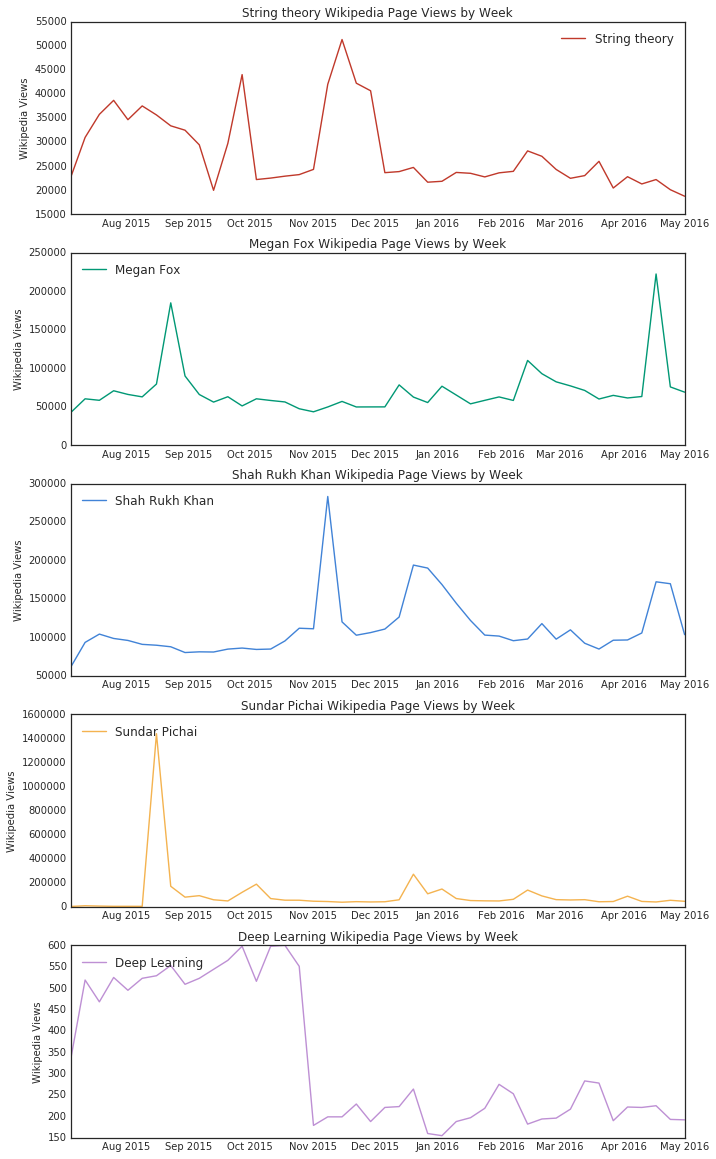

In [21]:
matplotlib.style.use('seaborn-white')
plt.figure(figsize=(11,20))
ax1 = plt.subplot(511)
ax1.plot(st.index, st, color="#C0392B", linewidth=1.4, label = "String theory")
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.ylabel('Wikipedia Views')
plt.title('String theory Wikipedia Page Views by Week')

ax2 = plt.subplot(512)
ax2.plot(mf.index, mf, color="#019875", linewidth=1.4, label = "Megan Fox")
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.ylabel('Wikipedia Views')
plt.title('Megan Fox Wikipedia Page Views by Week')


ax3 = plt.subplot(513)
ax3.plot(srk.index, srk, color="#4183D7", linewidth=1.4, label = "Shah Rukh Khan")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Shah Rukh Khan Wikipedia Page Views by Week')

ax4 = plt.subplot(514)
ax4.plot(sp.index, sp, color="#F4B350", linewidth=1.4, label = "Sundar Pichai")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Sundar Pichai Wikipedia Page Views by Week')

ax4 = plt.subplot(515)
ax4.plot(dl.index, dl, color="#BE90D4", linewidth=1.4, label = "Deep Learning")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Deep Learning Wikipedia Page Views by Week')

plt.savefig('Page_views2.png')

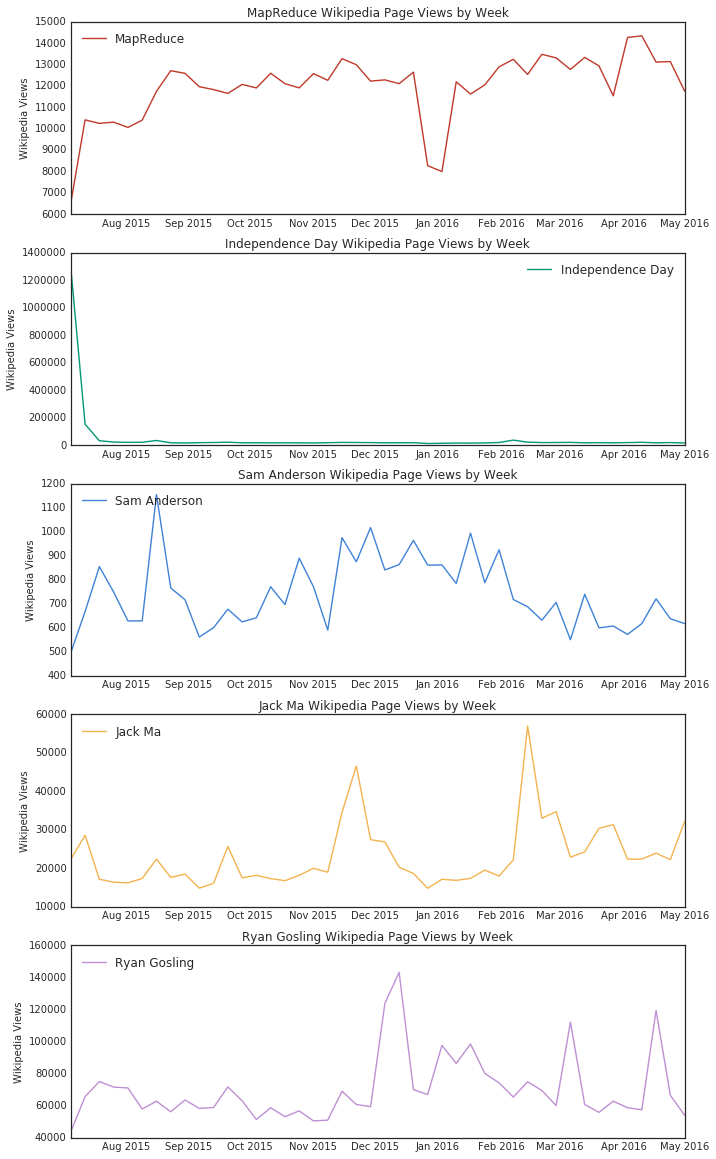

In [22]:
matplotlib.style.use('seaborn-white')
plt.figure(figsize=(11,20))
ax1 = plt.subplot(511)
ax1.plot(mr.index, mr, color="#C0392B", linewidth=1.4, label = "MapReduce")
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.ylabel('Wikipedia Views')
plt.title('MapReduce Wikipedia Page Views by Week')

ax2 = plt.subplot(512)
ax2.plot(idus.index, idus, color="#019875", linewidth=1.4, label = "Independence Day")
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.ylabel('Wikipedia Views')
plt.title('Independence Day Wikipedia Page Views by Week')

ax3 = plt.subplot(513)
ax3.plot(sa.index, sa, color="#4183D7", linewidth=1.4, label = "Sam Anderson")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Sam Anderson Wikipedia Page Views by Week')

ax4 = plt.subplot(514)
ax4.plot(jm.index, jm, color="#F4B350", linewidth=1.4, label = "Jack Ma")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Jack Ma Wikipedia Page Views by Week')

ax4 = plt.subplot(515)
ax4.plot(rg.index, rg, color="#BE90D4", linewidth=1.4, label = "Ryan Gosling")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Wikipedia Views')
plt.title('Ryan Gosling Wikipedia Page Views by Week')

plt.savefig('Page_views3.png')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

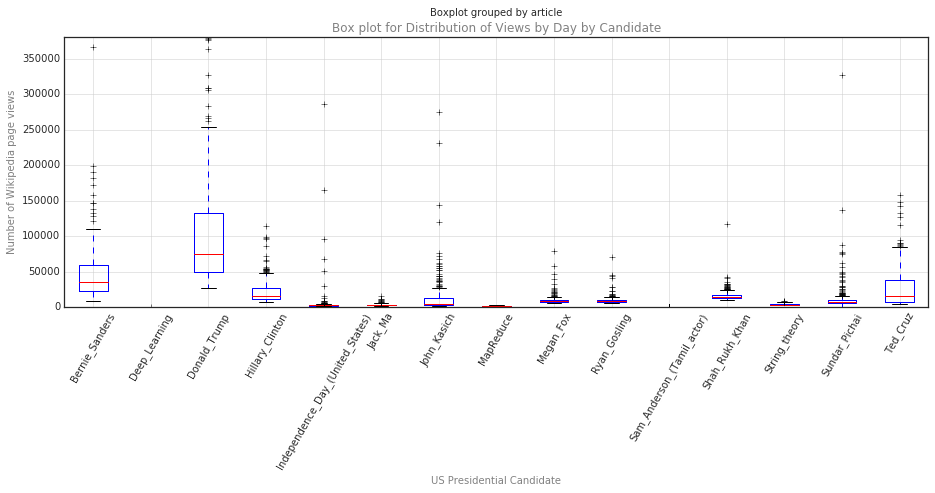

In [46]:

plt.figure(figsize=(10,10))
matplotlib.style.use('seaborn-white')
ax=data.boxplot(by='article', figsize=(15,5), meanline = True)
plt.ylim(0,380000)
plt.title("\nBox plot for Distribution of Views by Day by Candidate", color='grey')
plt.ylabel("Number of Wikipedia page views", rotation=90, color='grey', size=10)
plt.xlabel("US Presidential Candidate", color='grey', size=10)
plt.savefig('boxplot.png')
plt.setp(ax.get_xticklabels(), fontsize=10, rotation=60)

**Google Trends**

In [68]:
gt_bs = pd.read_csv('final_output_bs.csv')
gt_hc = pd.read_csv('final_output_hc.csv')
gt_tc = pd.read_csv('final_output_tc.csv')
gt_dt = pd.read_csv('final_output_dt.csv')
gt_jk = pd.read_csv('final_output_jk.csv')
gt_st = pd.read_csv('final_output_st.csv')
gt_mf = pd.read_csv('final_output_mf.csv')
gt_srk = pd.read_csv('final_output_srk.csv')
gt_sp = pd.read_csv('final_output_sp.csv')
gt_dl = pd.read_csv('final_output_dl.csv')
gt_mr = pd.read_csv('final_output_mr.csv')
gt_idus = pd.read_csv('final_output_idus.csv')
gt_sa = pd.read_csv('final_output_sa.csv')
gt_rg = pd.read_csv('final_output_rg.csv')
gt_jm = pd.read_csv('final_output_jm.csv')

In [73]:
gt_bs['Date']=pd.to_datetime(gt_bs['Date'])
mask = (gt_bs['Date'] >= '2015-07-01') & (gt_bs['Date'] <= '2016-04-30')
gt_bs1 = gt_bs.loc[mask]
gt_bs1 = gt_bs1.set_index('Date')

gt_hc['Date']=pd.to_datetime(gt_hc['Date'])
mask = (gt_hc['Date'] >= '2015-07-01') & (gt_hc['Date'] <= '2016-04-30')
gt_hc1 = gt_hc.loc[mask]
gt_hc1 = gt_hc1.set_index('Date')

gt_dt['Date']=pd.to_datetime(gt_dt['Date'])
mask = (gt_dt['Date'] >= '2015-07-01') & (gt_dt['Date'] <= '2016-04-30')
gt_dt1 = gt_dt.loc[mask]
gt_dt1 = gt_dt1.set_index('Date')

gt_tc['Date']=pd.to_datetime(gt_tc['Date'])
mask = (gt_tc['Date'] >= '2015-07-01') & (gt_tc['Date'] <= '2016-04-30')
gt_tc1 = gt_tc.loc[mask]
gt_tc1 = gt_tc1.set_index('Date')

gt_jk['Date']=pd.to_datetime(gt_jk['Date'])
mask = (gt_jk['Date'] >= '2015-07-01') & (gt_jk['Date'] <= '2016-04-30')
gt_jk1 = gt_jk.loc[mask]
gt_jk1 = gt_jk1.set_index('Date')

gt_st['Date']=pd.to_datetime(gt_st['Date'])
mask = (gt_st['Date'] >= '2015-07-01') & (gt_st['Date'] <= '2016-04-30')
gt_st1 = gt_st.loc[mask]
gt_st1 = gt_st1.set_index('Date')

gt_mf['Date']=pd.to_datetime(gt_mf['Date'])
mask = (gt_mf['Date'] >= '2015-07-01') & (gt_mf['Date'] <= '2016-04-30')
gt_mf1 = gt_mf.loc[mask]
gt_mf1 = gt_mf1.set_index('Date')

gt_srk['Date']=pd.to_datetime(gt_srk['Date'])
mask = (gt_srk['Date'] >= '2015-07-01') & (gt_srk['Date'] <= '2016-04-30')
gt_srk1 = gt_srk.loc[mask]
gt_srk1 = gt_srk1.set_index('Date')

gt_sp['Date']=pd.to_datetime(gt_sp['Date'])
mask = (gt_sp['Date'] >= '2015-07-01') & (gt_sp['Date'] <= '2016-04-30')
gt_sp1 = gt_sp.loc[mask]
gt_sp1 = gt_sp1.set_index('Date')

gt_dl['Date']=pd.to_datetime(gt_dl['Date'])
mask = (gt_dl['Date'] >= '2015-07-01') & (gt_dl['Date'] <= '2016-04-30')
gt_dl1 = gt_dl.loc[mask]
gt_dl1 = gt_dl1.set_index('Date')

gt_mr['Date']=pd.to_datetime(gt_mr['Date'])
mask = (gt_mr['Date'] >= '2015-07-01') & (gt_mr['Date'] <= '2016-04-30')
gt_mr1 = gt_mr.loc[mask]
gt_mr1 = gt_mr1.set_index('Date')

gt_idus['Date']=pd.to_datetime(gt_idus['Date'])
mask = (gt_idus['Date'] >= '2015-07-01') & (gt_idus['Date'] <= '2016-04-30')
gt_idus1 = gt_idus.loc[mask]
gt_idus1 = gt_idus1.set_index('Date')

gt_sa['Date']=pd.to_datetime(gt_sa['Date'])
mask = (gt_sa['Date'] >= '2015-07-01') & (gt_sa['Date'] <= '2016-04-30')
gt_sa1 = gt_sa.loc[mask]
gt_sa1 = gt_sa1.set_index('Date')

gt_jm['Date']=pd.to_datetime(gt_jm['Date'])
mask = (gt_jm['Date'] >= '2015-07-01') & (gt_jm['Date'] <= '2016-04-30')
gt_jm1 = gt_jm.loc[mask]
gt_jm1 = gt_jm1.set_index('Date')

gt_rg['Date']=pd.to_datetime(gt_rg['Date'])
mask = (gt_rg['Date'] >= '2015-07-01') & (gt_rg['Date'] <= '2016-04-30')
gt_rg1 = gt_rg.loc[mask]
gt_rg1 = gt_rg1.set_index('Date')

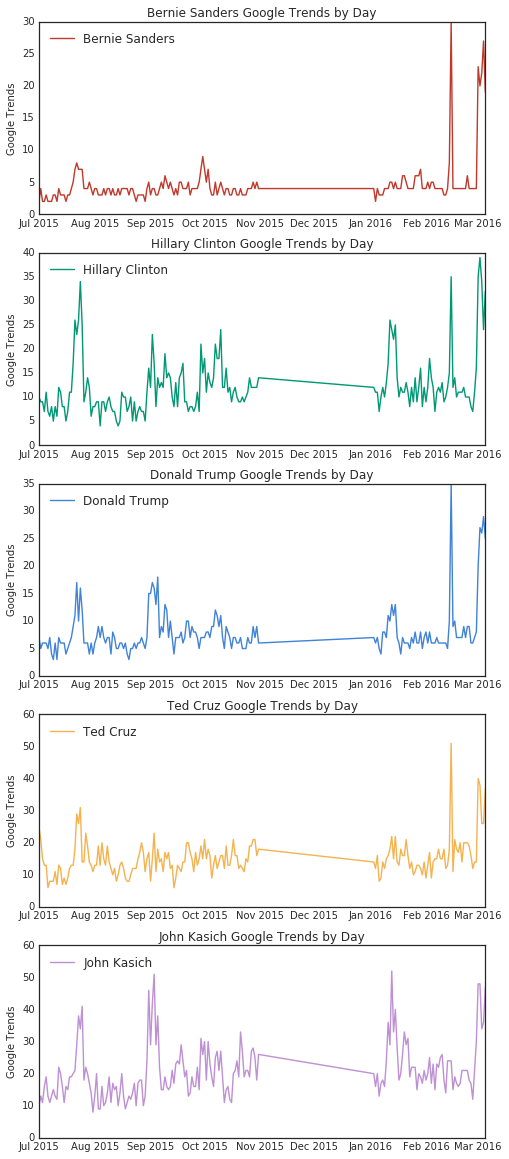

In [74]:
plt.figure(figsize=(8,20))
ax1 = plt.subplot(511)
ax1.plot(gt_bs1['Volume'], label = "Bernie Sanders",color="#C0392B", linewidth=1.4,)
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Google Trends')
plt.title('Bernie Sanders Google Trends by Day')

ax2 = plt.subplot(512)
ax2.plot(gt_hc1['Volume'], color="#019875", linewidth=1.4, label = "Hillary Clinton")
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.ylabel('Google Trends')
plt.title('Hillary Clinton Google Trends by Day')

ax3 = plt.subplot(513)
ax3.plot(gt_dt1['Volume'], color="#4183D7", linewidth=1.4, label = "Donald Trump")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Google Trends')
plt.title('Donald Trump Google Trends by Day')

ax4 = plt.subplot(514)
ax4.plot(gt_tc1['Volume'], color="#F4B350", linewidth=1.4, label = "Ted Cruz")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Google Trends')
plt.title('Ted Cruz Google Trends by Day')

ax4 = plt.subplot(515)
ax4.plot(gt_jk1['Volume'], color="#BE90D4", linewidth=1.4, label = "John Kasich")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Google Trends')
plt.title('John Kasich Google Trends by Day')

plt.savefig('Google_Trends1.png')


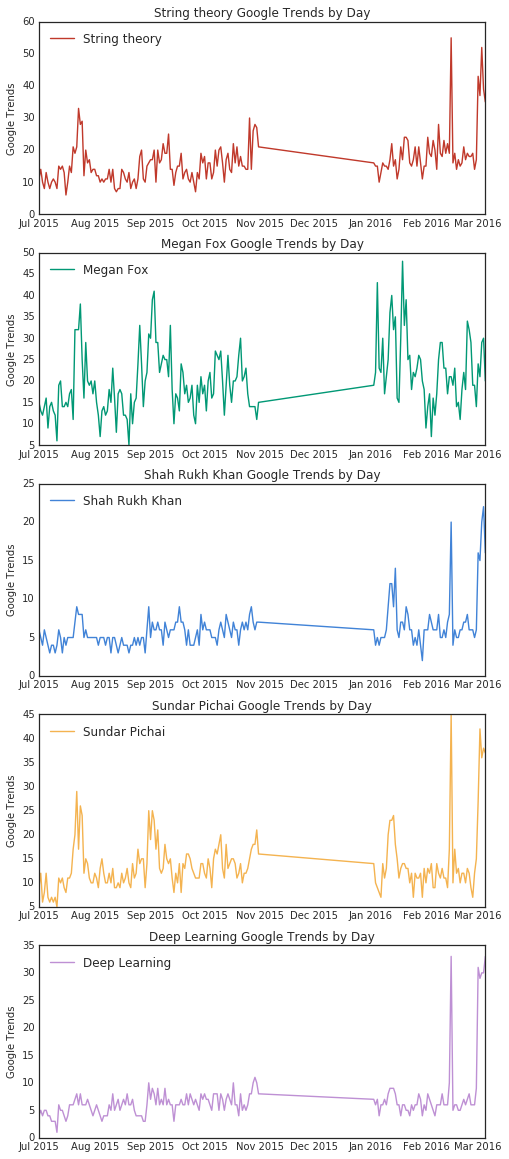

In [75]:
plt.figure(figsize=(8,20))
ax1 = plt.subplot(511)
ax1.plot(gt_st1['Volume'], label = "String theory",color="#C0392B", linewidth=1.4,)
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Google Trends')
plt.title('String theory Google Trends by Day')

ax2 = plt.subplot(512)
ax2.plot(gt_mf1['Volume'], color="#019875", linewidth=1.4, label = "Megan Fox")
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.ylabel('Google Trends')
plt.title('Megan Fox Google Trends by Day')

ax3 = plt.subplot(513)
ax3.plot(gt_srk1['Volume'], color="#4183D7", linewidth=1.4, label = "Shah Rukh Khan")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Google Trends')
plt.title('Shah Rukh Khan Google Trends by Day')

ax4 = plt.subplot(514)
ax4.plot(gt_sp1['Volume'], color="#F4B350", linewidth=1.4, label = "Sundar Pichai")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Google Trends')
plt.title('Sundar Pichai Google Trends by Day')

ax4 = plt.subplot(515)
ax4.plot(gt_dl1['Volume'], color="#BE90D4", linewidth=1.4, label = "Deep Learning")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Google Trends')
plt.title('Deep Learning Google Trends by Day')

plt.savefig('Google_Trends2.png')


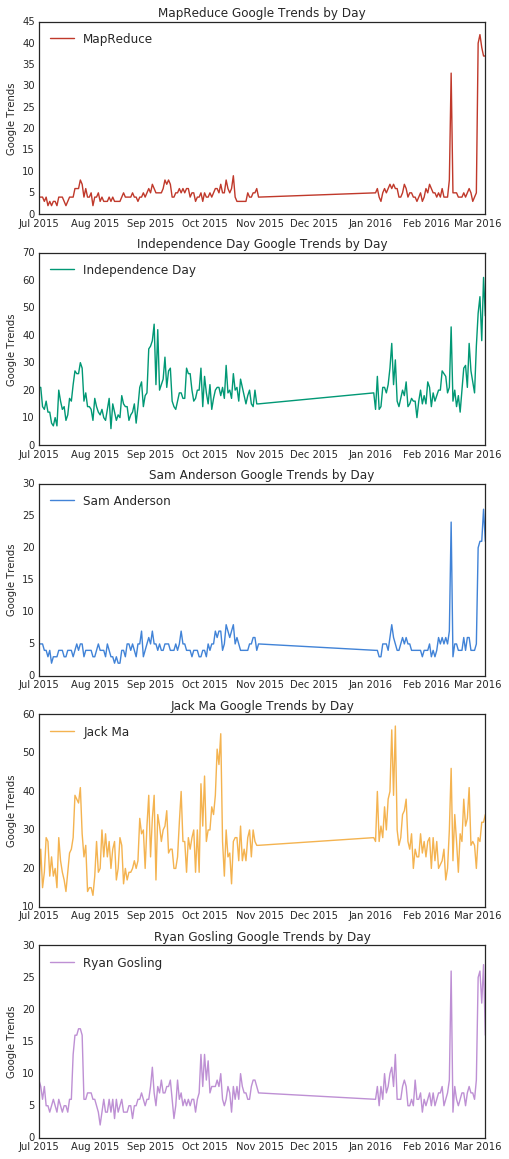

In [79]:
plt.figure(figsize=(8,20))
ax1 = plt.subplot(511)
ax1.plot(gt_mr1['Volume'], label = "MapReduce",color="#C0392B", linewidth=1.4,)
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Google Trends')
plt.title('MapReduce Google Trends by Day')

ax2 = plt.subplot(512)
ax2.plot(gt_idus1['Volume'], color="#019875", linewidth=1.4, label = "Independence Day")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Google Trends')
plt.title('Independence Day Google Trends by Day')

ax3 = plt.subplot(513)
ax3.plot(gt_sa1['Volume'], color="#4183D7", linewidth=1.4, label = "Sam Anderson")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Google Trends')
plt.title('Sam Anderson Google Trends by Day')

ax4 = plt.subplot(514)
ax4.plot(gt_jm1['Volume'], color="#F4B350", linewidth=1.4, label = "Jack Ma")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Google Trends')
plt.title('Jack Ma Google Trends by Day')

ax4 = plt.subplot(515)
ax4.plot(gt_rg1['Volume'], color="#BE90D4", linewidth=1.4, label = "Ryan Gosling")
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.ylabel('Google Trends')
plt.title('Ryan Gosling Google Trends by Day')

plt.savefig('Google_Trends2.png')
